In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
#Reading data from csv files.
train=pd.read_csv("Desktop/eda/archive/train_LZdllcl.csv")
test=pd.read_csv("Desktop/eda/archive/test_2umaH9m.csv")

In [3]:
#Reading top five records from train dataframe
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [205]:
#Checking size test and train dataframe
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


In [5]:
#Combining the test train dataset into one
combined=pd.concat([train,test])

In [6]:
#Check the size of the dataset
print(combined.shape)
combined.head()

(78298, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [7]:
# Gathering more information about dataset
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 9.0+ MB


In [8]:
#Checking the null values present in the dataset
combined.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [9]:
#Checking unique value present in the education column
combined.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [10]:
#Retrieving information about education null values
education=combined[combined['education'].isnull()]
education.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0.0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0.0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0.0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0.0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0.0


In [11]:
#Checking the age whose education equivalent to null
education.age.unique()

array([30, 41, 24, 25, 39, 20, 33, 31, 22, 48, 58, 53, 23, 27, 43, 40, 29,
       36, 28, 45, 37, 26, 60, 34, 47, 42, 38, 50, 35, 49, 55, 32, 51, 46,
       21, 52, 44, 59, 56, 54, 57], dtype=int64)

In [12]:
#Checking unique value present in the department column
combined.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [13]:
#Checking condition education not null and having department alloated ,its count as well.
for i in combined['department'].unique():
    print(combined[(~combined['education'].isnull())&(combined['department']==i)]['education'].value_counts(),i)

Bachelor's          15917
Master's & above     6000
Name: education, dtype: int64 Sales & Marketing
Bachelor's          11079
Master's & above     4466
Below Secondary       249
Name: education, dtype: int64 Operations
Bachelor's          6558
Master's & above    3162
Below Secondary      288
Name: education, dtype: int64 Technology
Bachelor's          5681
Master's & above    1498
Name: education, dtype: int64 Analytics
Bachelor's          769
Master's & above    630
Name: education, dtype: int64 R&D
Bachelor's          6200
Master's & above    3645
Below Secondary      201
Name: education, dtype: int64 Procurement
Bachelor's          2683
Master's & above     739
Below Secondary      155
Name: education, dtype: int64 Finance
Bachelor's          2210
Master's & above    1061
Below Secondary      186
Name: education, dtype: int64 HR
Bachelor's          1150
Master's & above     228
Below Secondary      100
Name: education, dtype: int64 Legal


In [14]:
#Checking count while education and department group in together
combined.groupby('education')['department'].value_counts()

education         department       
Bachelor's        Sales & Marketing    15917
                  Operations           11079
                  Technology            6558
                  Procurement           6200
                  Analytics             5681
                  Finance               2683
                  HR                    2210
                  Legal                 1150
                  R&D                    769
Below Secondary   Technology             288
                  Operations             249
                  Procurement            201
                  HR                     186
                  Finance                155
                  Legal                  100
Master's & above  Sales & Marketing     6000
                  Operations            4466
                  Procurement           3645
                  Technology            3162
                  Analytics             1498
                  HR                    1061
                  F

In [15]:
# Checking random information from the given dataset
combined[combined['region']=='region_15']['education'].value_counts()

Bachelor's          2752
Master's & above     921
Below Secondary        1
Name: education, dtype: int64

In [16]:
#Checking percentage of each category present in education column
combined['education'].value_counts(1)*100

Bachelor's          69.797609
Master's & above    28.627346
Below Secondary      1.575045
Name: education, dtype: float64

In [17]:
#Changes are not much by using bfill
combined['education'].fillna(method='bfill').value_counts(1)*100

Bachelor's          69.752740
Master's & above    28.685279
Below Secondary      1.561981
Name: education, dtype: float64

In [18]:
#Changes are not much by using ffill
combined['education'].fillna(method='ffill').value_counts(1)*100

Bachelor's          69.862576
Master's & above    28.567780
Below Secondary      1.569644
Name: education, dtype: float64

In [19]:
#Applying forward fill for na element
combined['education']=combined['education'].fillna(method='ffill')

In [20]:
#Checking null elements in a dataset
combined.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [21]:
#Checking is_promoted unique element %
combined['is_promoted'].value_counts(1)*100

0.0    91.482995
1.0     8.517005
Name: is_promoted, dtype: float64

In [22]:
# Retrieving more information by combining group by department with is_promoted(maximum promotion department is sales operation)
combined['department'].groupby(combined['is_promoted']).value_counts(1)*100

is_promoted  department       
0.0          Sales & Marketing    31.166733
             Operations           20.592341
             Procurement          12.863981
             Technology           12.704428
             Analytics             9.652972
             Finance               4.646988
             HR                    4.551256
             Legal                 1.966494
             R&D                   1.854807
1.0          Sales & Marketing    25.985433
             Operations           21.915167
             Technology           16.452442
             Procurement          14.738646
             Analytics            10.968295
             Finance               4.413025
             HR                    2.913453
             R&D                   1.478149
             Legal                 1.135390
Name: department, dtype: float64

In [23]:
combined['is_promoted'].groupby(combined['education'].isnull()).value_counts(1)

education  is_promoted
False      0.0            0.91483
           1.0            0.08517
Name: is_promoted, dtype: float64

In [24]:
combined.isnull().mean()*100

employee_id              0.000000
department               0.000000
region                   0.000000
education                0.000000
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.581292
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
dtype: float64

In [25]:
#Checking the cause for null values(previous_year_rating has null values  because these employees have no experience)
combined['previous_year_rating'].groupby(combined['length_of_service']).unique()

length_of_service
1     [nan, 3.0, 5.0, 1.0, 4.0, 2.0]
2          [3.0, 1.0, 4.0, 2.0, 5.0]
3          [5.0, 3.0, 4.0, 1.0, 2.0]
4          [5.0, 1.0, 3.0, 4.0, 2.0]
5          [3.0, 4.0, 5.0, 1.0, 2.0]
6          [3.0, 4.0, 5.0, 1.0, 2.0]
7          [3.0, 5.0, 4.0, 2.0, 1.0]
8          [5.0, 3.0, 4.0, 1.0, 2.0]
9          [3.0, 1.0, 5.0, 4.0, 2.0]
10         [1.0, 5.0, 3.0, 2.0, 4.0]
11         [4.0, 5.0, 3.0, 1.0, 2.0]
12         [5.0, 3.0, 1.0, 2.0, 4.0]
13         [4.0, 1.0, 3.0, 5.0, 2.0]
14         [3.0, 5.0, 1.0, 2.0, 4.0]
15         [3.0, 4.0, 5.0, 1.0, 2.0]
16         [3.0, 1.0, 4.0, 2.0, 5.0]
17         [4.0, 5.0, 3.0, 2.0, 1.0]
18         [4.0, 3.0, 5.0, 1.0, 2.0]
19         [2.0, 3.0, 5.0, 4.0, 1.0]
20         [5.0, 3.0, 1.0, 2.0, 4.0]
21         [3.0, 1.0, 5.0, 4.0, 2.0]
22         [5.0, 1.0, 3.0, 4.0, 2.0]
23         [4.0, 3.0, 2.0, 5.0, 1.0]
24         [1.0, 3.0, 2.0, 5.0, 4.0]
25         [3.0, 4.0, 2.0, 1.0, 5.0]
26         [4.0, 3.0, 5.0, 1.0, 2.0]
27         [2.0, 5.0

In [26]:
# Cross check the condition in the dataset
combined[(combined['length_of_service']==1)&(combined['previous_year_rating']==4)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
1734,40259,Analytics,region_7,Bachelor's,m,other,1,29,4.0,1,1,0,84,0.0
2132,11653,Analytics,region_27,Bachelor's,m,sourcing,1,29,4.0,1,1,0,81,1.0
3345,64228,Sales & Marketing,region_24,Bachelor's,m,sourcing,2,28,4.0,1,0,0,54,0.0
4434,66424,Technology,region_2,Bachelor's,f,sourcing,2,23,4.0,1,1,0,81,0.0
4514,7181,Procurement,region_7,Bachelor's,f,sourcing,1,29,4.0,1,1,0,63,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19626,52434,Sales & Marketing,region_21,Bachelor's,f,other,1,27,4.0,1,1,0,49,NaN
20665,59854,Operations,region_2,Below Secondary,f,other,1,23,4.0,1,0,0,65,NaN
20806,43871,Technology,region_2,Bachelor's,f,referred,2,31,4.0,1,0,0,79,NaN
21075,4050,R&D,region_26,Bachelor's,m,sourcing,2,29,4.0,1,1,0,94,NaN


In [27]:
#Checking the unique vqlue present in the previous_year_rating column
combined.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [28]:
#Checking the % of elements present in is_promoted column
combined['is_promoted'].value_counts(1)*100

0.0    91.482995
1.0     8.517005
Name: is_promoted, dtype: float64

In [29]:
#Checking the %  of element(is_promoted) whose previous year rating is null
combined['is_promoted'].groupby(combined['previous_year_rating'].isnull()).value_counts(1)*100

previous_year_rating  is_promoted
False                 0.0            91.458843
                      1.0             8.541157
True                  0.0            91.779825
                      1.0             8.220175
Name: is_promoted, dtype: float64

In [30]:
#Checking the number of element(is_promoted) whose previous year rating is null
combined['education'].groupby(combined['previous_year_rating'].isnull()).value_counts()

previous_year_rating  education       
False                 Bachelor's          49625
                      Master's & above    22018
                      Below Secondary       719
True                  Bachelor's           5076
                      Below Secondary       510
                      Master's & above      350
Name: education, dtype: int64

In [31]:
#Filling with zero because they have no experience 
combined['previous_year_rating']=combined['previous_year_rating'].fillna(value=0)

In [32]:
# Cheching employee id size uniquely
combined['employee_id'].unique().shape


(78298,)

In [33]:
 # Employee id is not necessary for promotion
combined.drop('employee_id',axis=1,inplace=True)

In [34]:
 # Department is necessary decide the promotion
combined['is_promoted'].groupby(combined['department']).value_counts() 

department         is_promoted
Analytics          0.0             4840
                   1.0              512
Finance            0.0             2330
                   1.0              206
HR                 0.0             2282
                   1.0              136
Legal              0.0              986
                   1.0               53
Operations         0.0            10325
                   1.0             1023
Procurement        0.0             6450
                   1.0              688
R&D                0.0              930
                   1.0               69
Sales & Marketing  0.0            15627
                   1.0             1213
Technology         0.0             6370
                   1.0              768
Name: is_promoted, dtype: int64

In [35]:
 # Checking promotion done by region
combined.groupby('is_promoted')['region'].value_counts()[1]

region
region_2     989
region_22    734
region_7     516
region_4     246
region_13    230
region_15    222
region_28    154
region_26    143
region_23    137
region_27    131
region_31    110
region_17    109
region_25    103
region_16    102
region_11     74
region_14     62
region_30     59
region_1      58
region_19     53
region_8      53
region_10     51
region_20     49
region_29     43
region_32     40
region_3      37
region_5      35
region_12     33
region_6      32
region_21     18
region_24     18
region_33     10
region_34      8
region_9       8
region_18      1
Name: region, dtype: int64

In [36]:
high_promo_reg=['region_2','region_22','region_7','region_4','region_13','region_15','region_28','region_26','region_23'
                ,'region_27','region_31','region_17','region_25','region_16']
    
medium_promo_reg=['region_6','region_12','region_5','region_3','region_32','region_29','region_20','region_10','region_8',
                  'region_19','region_1','region_30','region_14','region_11']
low_promo_reg=['region_18','region_9','region_34','region_33','region_24','region_21']

In [37]:
def reg(x):
    if x in high_promo_reg:
         return  'high_promo_reg'
    elif x in medium_promo_reg:
         return  'medium_promo_reg'
    else :
         return  'low_promo_reg'

In [38]:
combined['region_promo']=combined['region'].apply(reg)

In [39]:
combined['region_promo'].value_counts()

high_promo_reg      60256
medium_promo_reg    15232
low_promo_reg        2810
Name: region_promo, dtype: int64

In [40]:
combined['is_promoted'].groupby(combined['region_promo']).value_counts(1)*100 

region_promo      is_promoted
high_promo_reg    0.0            90.696682
                  1.0             9.303318
low_promo_reg     0.0            96.737442
                  1.0             3.262558
medium_promo_reg  0.0            93.640536
                  1.0             6.359464
Name: is_promoted, dtype: float64

In [41]:
combined['region_promo']=combined['region_promo'].map({'high_promo_reg':2,'medium_promo_reg':1,'low_promo_reg':0})

In [42]:
combined.drop('region',axis=1,inplace=True)

In [43]:
combined.groupby('gender')['is_promoted'].value_counts()

gender  is_promoted
f       0.0            14845
        1.0             1467
m       0.0            35295
        1.0             3201
Name: is_promoted, dtype: int64

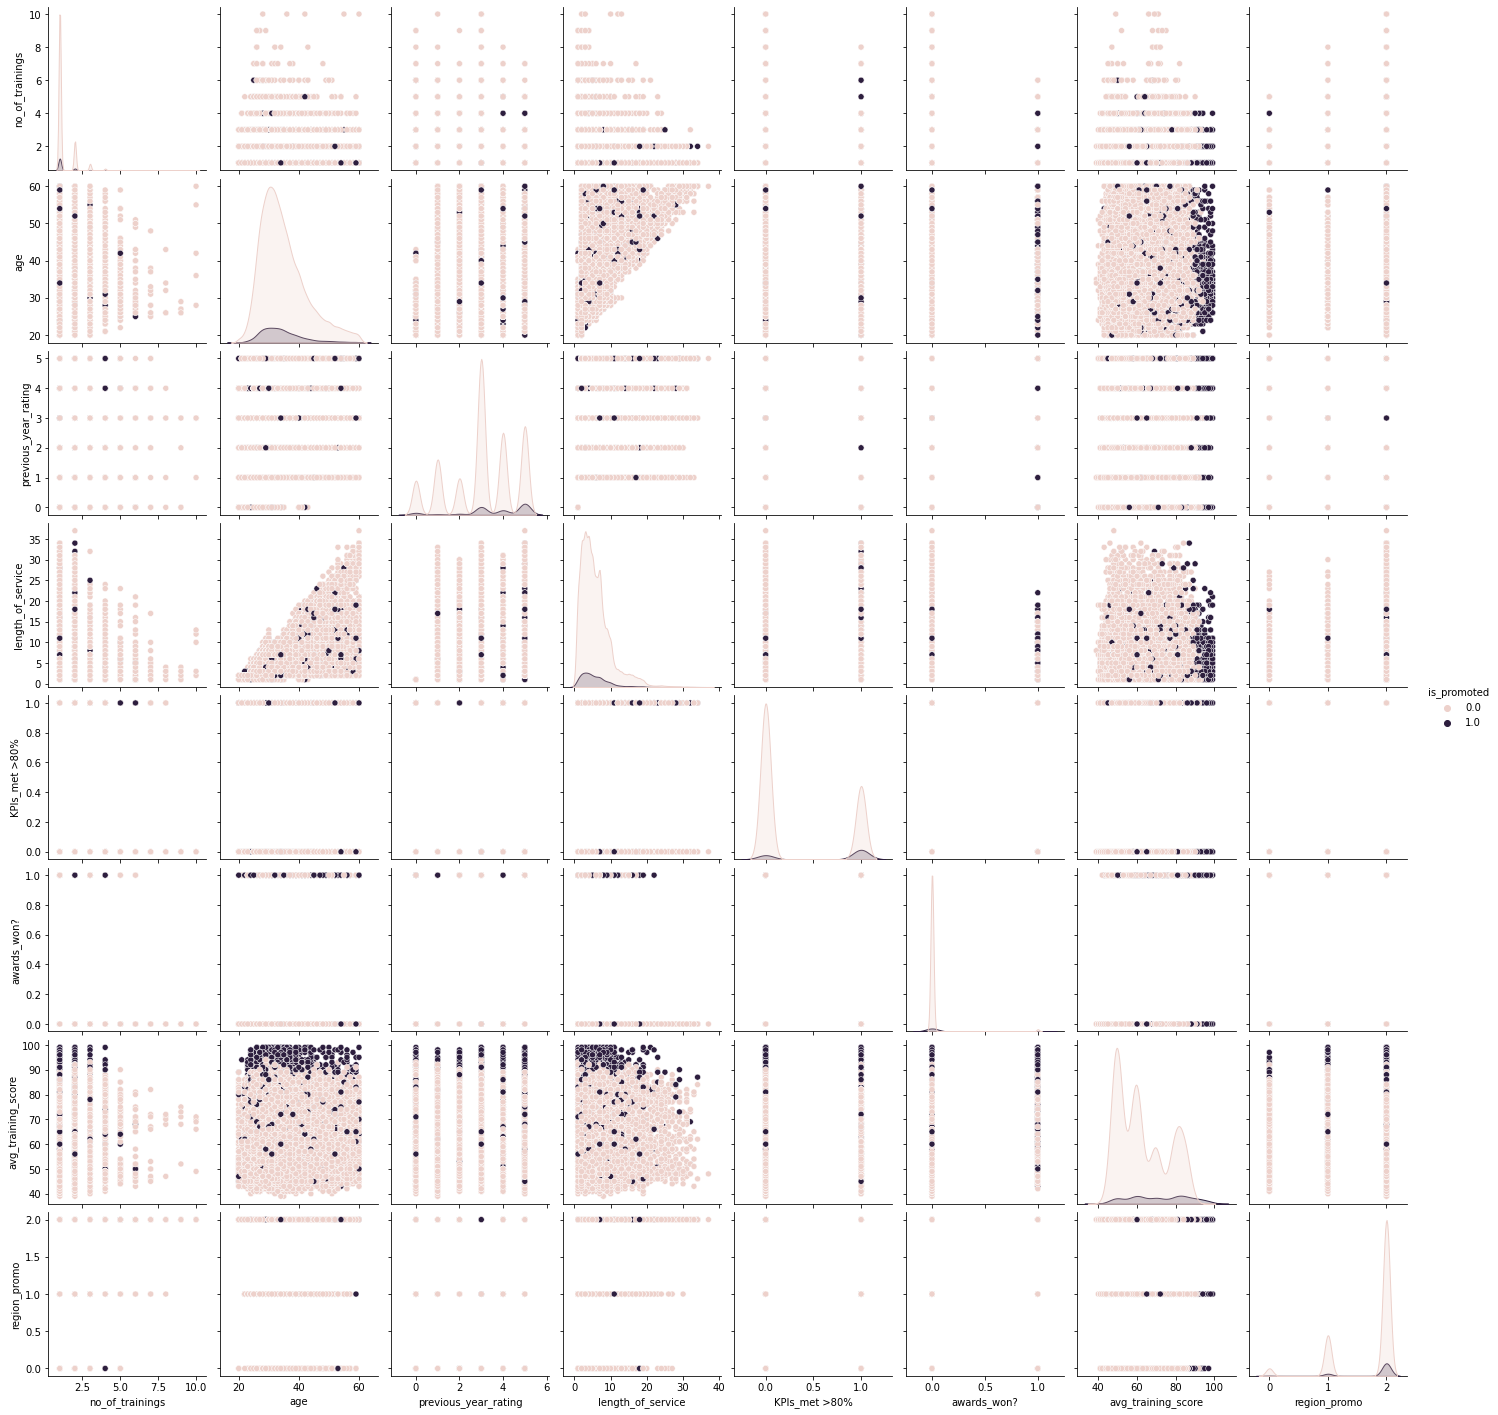

In [44]:
sns.pairplot(combined,hue='is_promoted')

In [45]:
combined.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_promo
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,2
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,2
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,1
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,2
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,2


In [46]:
combined.education.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [47]:
combined['education']=combined['education'].map({"Master's & above":2,"Bachelor's":1,'Below Secondary':0})

In [48]:
combined.describe()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_promo
count,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000,78298.000000
mean,1.269981,1.253378,34.797619,3.079593,5.848974,0.354032,0.023053,63.349664,0.085170,1.733684
std,0.478003,0.606766,7.665928,1.499173,4.248070,0.478222,0.150073,13.383664,0.279137,0.516887
min,0.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000,0.000000
25%,1.000000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000,2.000000
50%,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,2.000000
75%,2.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,2.000000
max,2.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,2.000000


In [49]:
combined.skew()

education               0.597389
no_of_trainings         3.403109
age                     1.008714
previous_year_rating   -0.495361
length_of_service       1.728033
KPIs_met >80%           0.610477
awards_won?             6.356378
avg_training_score      0.453727
is_promoted             2.972339
region_promo           -1.805347
dtype: float64

In [50]:
# Convert categorical to numerical using one hot encoding the data 
dummies=pd.get_dummies(columns=['department','gender','recruitment_channel'],data=combined,drop_first=True)

In [51]:
dummies.shape

(78298, 21)

In [52]:
dummies.isnull().sum()

education                           0
no_of_trainings                     0
age                                 0
previous_year_rating                0
length_of_service                   0
KPIs_met >80%                       0
awards_won?                         0
avg_training_score                  0
is_promoted                     23490
region_promo                        0
department_Finance                  0
department_HR                       0
department_Legal                    0
department_Operations               0
department_Procurement              0
department_R&D                      0
department_Sales & Marketing        0
department_Technology               0
gender_m                            0
recruitment_channel_referred        0
recruitment_channel_sourcing        0
dtype: int64

In [53]:
#Applying model without Scaling
train1=dummies[~combined['is_promoted'].isnull()]
test1=dummies[combined['is_promoted'].isnull()]

In [54]:
test1.drop('is_promoted',axis=1,inplace=True)

C:\Users\278\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
test1.shape,train1.shape

((23490, 20), (54808, 21))

In [56]:
test.shape,train.shape

((23490, 13), (54808, 14))

In [57]:

ytrue=train1['is_promoted']
ytrue.head(),ytrue.shape

(0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 Name: is_promoted, dtype: float64,
 (54808,))

In [58]:
X=train1.drop('is_promoted',axis=1)

In [59]:
scaler=StandardScaler()

In [60]:
scaleXtrain=scaler.fit_transform(X)
scaleXtest=scaler.fit_transform(test1)

In [61]:
new_Xtrain=pd.DataFrame(scaleXtrain,columns=X.columns)
new_Xtest=pd.DataFrame(scaleXtest,columns=test1.columns)

In [62]:
lr=LogisticRegression(penalty='l2',C=1000)

In [63]:
lrmodel=lr.fit(new_Xtrain,ytrue)
y_lr=lr.predict(new_Xtest)

In [64]:
y_lr

array([0., 0., 0., ..., 0., 0., 1.])

In [65]:
pd.DataFrame(y_lr,columns=['is_promoted']).to_csv('ll.csv',index=False)

In [66]:
cd

C:\Users\278


In [67]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [68]:

knn=KNeighborsClassifier(n_neighbors=3)

In [69]:

knnmodel=knn.fit(new_Xtrain,ytrue)
y_knn=knn.predict(new_Xtest)

In [70]:

pd.DataFrame(y_knn,columns=['is_promoted']).to_csv('knnmodelhr.csv',index=False)

In [71]:

cd

C:\Users\278


In [72]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rfmodel=rf.fit(new_Xtrain,ytrue)
y_rf=rf.predict(new_Xtest)

In [73]:
pd.DataFrame(y_rf,columns=['is_promoted']).to_csv('rfmodelhr.csv',index=False)

In [74]:
cd

C:\Users\278


In [75]:
#Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [76]:
gbmodel=gb.fit(new_Xtrain,ytrue)
y_pd=gb.predict(new_Xtest)

In [77]:
pd.DataFrame(y_pd,columns=['is_promoted']).to_csv('rfmodelhr.csv',index=False)

In [78]:
cd

C:\Users\278


In [79]:
#Applying Smot because data is imbalance

In [ ]:
pip install imblearn

In [80]:
from imblearn.combine import SMOTETomek 
smt=SMOTETomek()

In [81]:
x_reset,y_reset=smt.fit_resample(new_Xtrain,ytrue)

In [82]:
ytrue.value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

In [83]:
y_reset.value_counts() # after balancing the class of both promoted or not promted

1.0    49435
0.0    49435
Name: is_promoted, dtype: int64

In [84]:
# After balancing data 
#knn
knn=KNeighborsClassifier()
knnsmot=knn.fit(x_reset,y_reset)
y_knnsmot=knn.predict(new_Xtest)

In [85]:
pd.DataFrame(y_knnsmot,columns=['is_promoted']).to_csv('knnsmotmodelhr.csv',index=False) # 35.10

In [86]:
cd

C:\Users\278


In [87]:
#Random Forest
rf=RandomForestClassifier(n_estimators=500,criterion='entropy')
rfsmot=rf.fit(x_reset,y_reset)
y_rfsmot=rf.predict(new_Xtest)

In [88]:
rf.score(x_reset,y_reset)

0.9986952563972894

In [89]:

pd.DataFrame(y_rfsmot,columns=['is_promoted']).to_csv('randomforest.csv',index=False) # 45.79

In [90]:
cd

C:\Users\278


In [91]:
#Gradient Boosting
gb=GradientBoostingClassifier(n_estimators=500,learning_rate=0.2)

In [92]:

gb=RandomForestClassifier()
gbsmot=gb.fit(x_reset,y_reset)
y_gbsmot=gb.predict(new_Xtest)

In [93]:
pd.DataFrame(y_gbsmot,columns=['is_promoted']).to_csv('gbsmotmodeltune.csv',index=False) # 45.76

In [94]:

cd

C:\Users\278


In [95]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(base_estimator=rf)

In [96]:
bcodel=bc.fit(x_reset,y_reset)
y_bc=bc.predict(new_Xtest)

In [97]:

pd.DataFrame(y_bc,columns=['is_promoted']).to_csv('baggingrandomforest.csv',index=False) # 45.76

In [98]:
cd

C:\Users\278


In [ ]:
#Use feature selection by Statistics

In [99]:
dummies.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_promo,...,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,2,1,35,5.0,8,1,0,49,0.0,2,...,0,0,0,0,0,1,0,0,0,1
1,1,1,30,5.0,4,0,0,60,0.0,2,...,0,0,1,0,0,0,0,1,0,0
2,1,1,34,3.0,7,0,0,50,0.0,1,...,0,0,0,0,0,1,0,1,0,1
3,1,2,39,1.0,10,0,0,50,0.0,2,...,0,0,0,0,0,1,0,1,0,0
4,1,1,45,3.0,2,0,0,73,0.0,2,...,0,0,0,0,0,0,1,1,0,0


In [100]:
from sklearn.feature_selection import RFE

In [101]:

rfe=RFE(estimator=lr,n_features_to_select=10)


In [102]:
selct=rfe.fit(x_reset,y_reset)
selct.get_support

<bound method SelectorMixin.get_support of RFE(estimator=LogisticRegression(C=1000), n_features_to_select=10)>

In [103]:
selct.ranking_

array([ 7,  5,  3,  2,  6,  1,  4,  1,  1,  1,  1,  1,  1,  1,  8,  1,  1,
       11, 10,  9])

In [104]:
x_reset.columns

Index(['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'region_promo', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')

In [105]:
newx_reset=x_reset[['KPIs_met >80%',
       'avg_training_score', 'region_promo', 'department_Finance',
       'department_HR', 'department_Legal','department_Sales & Marketing', 'department_Technology','department_R&D',
       'department_Sales & Marketing']]
new_newXtest=new_Xtest[['KPIs_met >80%',
       'avg_training_score', 'region_promo', 'department_Finance',
       'department_HR', 'department_Legal','department_Sales & Marketing', 'department_Technology','department_R&D',
       'department_Sales & Marketing']]

In [106]:
rf=RandomForestClassifier()
rfsmot=rf.fit(newx_reset,y_reset)
y_new=rf.predict(new_newXtest)

In [107]:
pd.DataFrame(y_new,columns=['is_promoted']).to_csv('rfe2randomforest.csv',index=False) # 36

In [108]:
cd

C:\Users\278
